# Пересчёт массы газа $N_2$ в объём.

<div align='center'>
    <img src='./Nitrogen.Spectrum.Vis.jpg'>
    <br/>
    <span style='font-size:0.7rem'>Оптический эмиссионный спектр азота</span>
</div>

## Уравнение состояния идеального газа `Менделеева — Клапейрона`:

$$\Large
    P * V = ν * R * T
$$

**где**  
  
$P$ — давление, $Па$   
$V$ — объём газа, $м^3$  
$\nu$  — количество вещества, $моль$  
$R$ — универсальная газовая постоянная, $Дж/(моль⋅К)$  
$T$ — термодинамическая температура, $К$ 

**количество вещества**:

$$\large
    \nu = \frac{m}{M}
$$
  
где  
  
$\nu$  — количество вещества, $моль$  
$M$ — молярная масса, $кг/моль$   
$m$ — масса, $кг$

**плотность**:

$$\large
     ρ = \frac{m}{V}
$$
  
где  
  
$ρ$  — плотность, $кг/м^3$  
  
$m$ — масса, $кг$   
$V$ — объём, $м^3$

преобразуем формулу `Менделеева — Клапейрона`

$$\Large
    P * V = \frac{m * R * T}{M}
$$
  
$$
    V = \frac{m * R * T}{P * M}
$$
  
$$
    \frac{V}{m} = \frac{R * T}{P * M}
$$

**тогда**  
  
$$\Large
    ρ = \frac{P * M}{R * T}
$$  
  
где  
  
$\large ρ$ – плотность газа, $кг/м^3$  
  
$\large M$ – молярная масса, $кг/моль$  
$\large P$ – давление газа, $Па$  
$\large R$ – универсальная газовая постоянная, $Дж/(моль\cdotК)$  
$\large T$ – температура газа, $К$

<hr>

**Для справки:**
  

$\large t_k = t_{^{\circ} c} + 273.15$, К  
$\large 1_{мм\spaceрт.\spaceст.} = 133.3$, Па  
молярная масса азота = $\large 14.007$, г/моль  
диапазон молярных масс азота: [14.00643, 14.00728]


<hr>

**Для азота** $N_2$
  
$ρ$ – плотность газа, $кг/м^3$  
  
${\large M =\space} (14.007 + 14.007)*10^{-3} = 28.014*10^{-3}, кг/моль$  
${\large P =\space} 101308, Па$  
${\large R =\space} 8.31446261815324, Дж/(моль*К)$  
${\large T =\space} 273.15, K$

Тогда для азота $N_2$,  **при условии 0 °С и давлении 101.308 кПа** (760 мм рт. ст.).  
  
$$\large
    ρ_{N_2} = \frac{28.014*101308}{8.31446261815324*273.15}
$$

$$\large
    = \frac{2838042.312}{2271.0954641485573}
$$

$$\large
    = 1.249636 , кг/м^3
$$

И действительно:  
**«Газообразный азот - инертный газ без цвета и запаха плотностью 1,25046 кг/м при 0 °С и давлении 101,3 кПа.»**  
  
ГОСТ 9293-74

<hr>

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def calc_density(temperature, atm=11):
    t_celsius = temperature
    atm = atm
    mm_hg = ATM_HG * atm

    c_to_k = t_celsius + TO_K
    mm_hg_to_pa = round(mm_hg * TO_PA, 3)


    p_gas = (
        ATOMIC_WEIGHT_N2
        * mm_hg_to_pa
    ) / (
        IDEAL_GAS_CONSTANT
        * c_to_k
    )
    
    return p_gas

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (7, 4),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
            }

### Константы

In [4]:
TO_PA = 133.3
TO_K = 273.15
ATM_HG = 760
ATOMIC_WEIGHT_N2 = (14.007 + 14.007) * 10 ** (-3)
IDEAL_GAS_CONSTANT = 8.31446261815324

Расчитаем плотность **азота** при нормальных условиях:  
0 °С и давлении 101.308 кПа (760 мм рт. ст.)

In [5]:
print('Плотность азота:')
print(f'{round(calc_density(0, atm=1),6)} кг/м³')

Плотность азота:
1.249636 кг/м³


In [ ]:
dens_from_temp = pd.DataFrame(columns=['temperature', 'density'])
dens_from_temp.loc[: , 'temperature'] = list(range(-30, 36, 5))
dens_from_temp.loc[: , 'density'] = dens_from_temp.loc[: ,
            'temperature'
          ].apply(lambda t: calc_density(t))

### График зависимости газообразного азота от температуры, при давлении 11 атмосфер

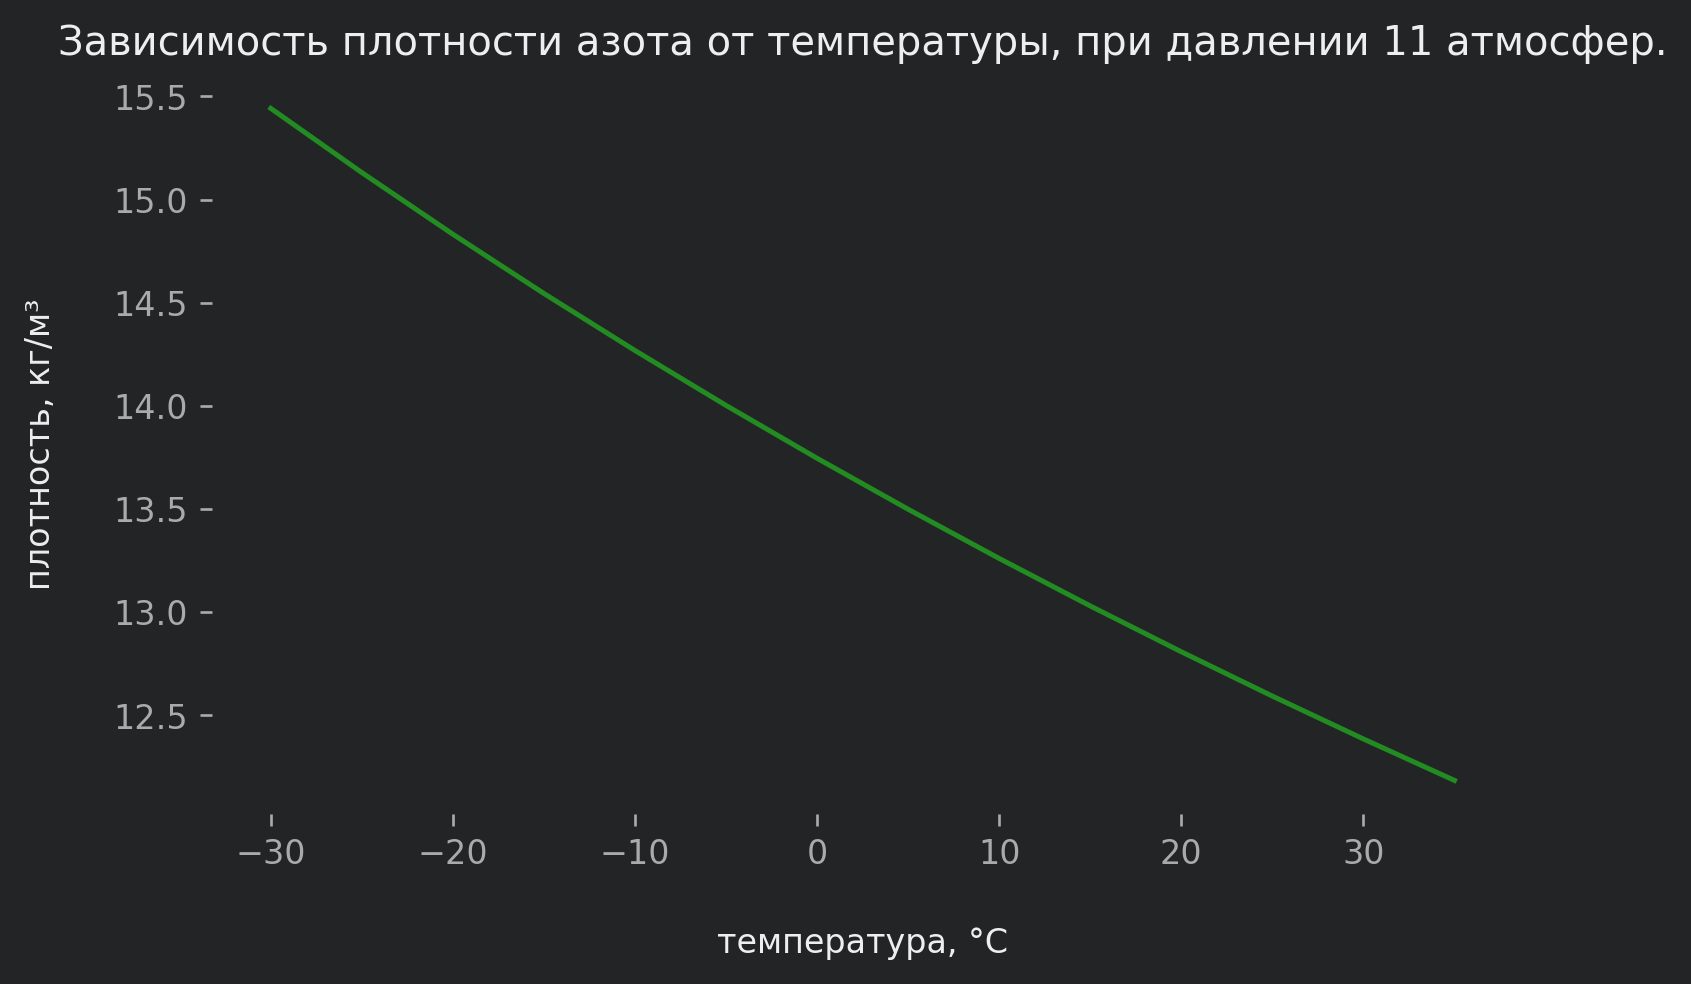

In [7]:
with mpl.rc_context(custom_params):
    plt.plot(
        dens_from_temp['temperature'],
        dens_from_temp['density'],
        color='forestgreen',
    )
    plt.title('Зависимость плотности азота от температуры, при давлении 11 атмосфер.')
    plt.xlabel('температура, °С')
    plt.ylabel('плотность, кг/м³')
    plt.show()

Таблица зависимости плотности азота от температуры, при давлении 11 атмосфер.

In [8]:
display(dens_from_temp)

,temperature,density
0,-30,15.441984
1,-25,15.130842
2,-20,14.831990
3,-15,14.544716
4,-10,14.268358
5,-5,14.002306
6,0,13.745994
7,5,13.498898
8,10,13.260527
9,15,13.030430
